### What is Piecewise Regression?

**Piecewise regression** is a technique used when a single linear model isn't sufficient to fit the data. Instead of fitting a single straight line, we break the data into segments (or "pieces") and fit separate linear models to each segment. This approach allows us to capture different trends within the data more accurately.

Here's why piecewise regression is useful:

1. **Changing Trends:**
   - In time series data, trends can change over time due to various factors.
   - A single linear model may not capture these changing trends effectively.

2. **Application to Time Series Forecasting:**
   - Piecewise regression helps improve forecasting accuracy by considering different linear trends within the data.
   - It adapts to variations in the underlying process.

### Python Example: Piecewise Regression

Let's create a simple Python example using synthetic time series data. We'll use the `statsmodels` library to fit piecewise linear regression models.


In this example:
- We generate synthetic data with a change point (mean shifts from 10 to 20).
- The piecewise regression model adapts to the change in trend.
- We fit separate linear models before and after the change point.

Feel free to apply piecewise regression to your own time series data! 🔄📊

For more details, you can refer to the following resources:
- [Time Series Analysis in Python – A Comprehensive Guide with Examples](https://www.machinelearningplus.com/time-series/time-series-analysis-python/) ¹
- [Make Predictions for Time Series Forecasting with Python](https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/) ²
- [An End-to-End Project on Time Series Analysis and Forecasting with Python](https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b) ³

Source: Conversation with Bing, 16/5/2024
(1) Time Series Analysis in Python – A Comprehensive Guide with Examples. https://www.machinelearningplus.com/time-series/time-series-analysis-python/.
(2) How to Make Predictions for Time Series Forecasting with Python. https://machinelearningmastery.com/make-predictions-time-series-forecasting-python/.
(3) An End-to-End Project on Time Series Analysis and Forecasting with Python. https://towardsdatascience.com/an-end-to-end-project-on-time-series-analysis-and-forecasting-with-python-4835e6bf050b.
(4) undefined. https://raw.githubusercontent.com/selva86/datasets/master/a10.csv.

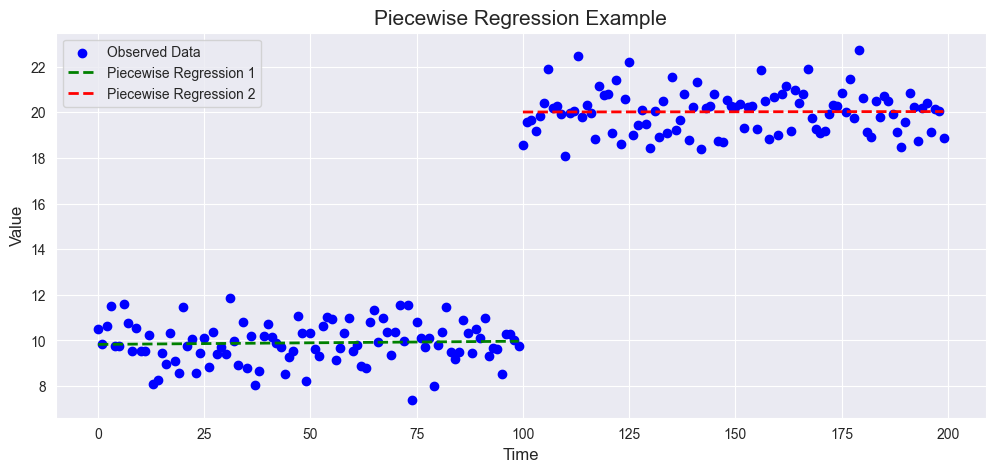

In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Generate synthetic time series data with a change point
np.random.seed(42)
n = 200
time = np.arange(n)
values = np.concatenate([np.random.normal(10, 1, n // 2), np.random.normal(20, 1, n // 2)])

# Detect the change point (where the trend shifts)
change_point = n // 2

# Fit piecewise linear regression models
x1 = sm.add_constant(time[:change_point])
x2 = sm.add_constant(time[change_point:])
y1 = values[:change_point]
y2 = values[change_point:]

model1 = sm.OLS(y1, x1).fit()
model2 = sm.OLS(y2, x2).fit()

# Predict using the fitted models
pred1 = model1.predict(x1)
pred2 = model2.predict(x2)

# Plot the data and piecewise regression lines
plt.figure(figsize=(12, 5))
sns.set_style("dark")
plt.scatter(time, values, label="Observed Data", color="blue")
plt.plot(time[:change_point], pred1, label="Piecewise Regression 1", color="green", linestyle="--", linewidth=2)
plt.plot(time[change_point:], pred2, label="Piecewise Regression 2", color="red", linestyle="--", linewidth=2)
plt.xlabel("Time", size=12)
plt.ylabel("Value", size=12)
plt.title("Piecewise Regression Example", size=15)
plt.legend()
plt.grid(True)
plt.show()


## Piecewise Regression Trend in Time Series Forecasting

**What is Piecewise Regression Trend?**

Piecewise regression, also known as segmented regression, is a technique used to model time series data that exhibits different linear trends in various segments. It's particularly useful when a single straight line wouldn't accurately capture the overall trend of the data.

**Why Use It in Time Series Forecasting?**

Imagine you have data for monthly sales over a year. The sales might initially increase steadily, then level off for a few months, and finally decline as a new product is introduced. A single linear regression wouldn't capture these complex trends effectively.

**Piecewise regression addresses this by:**

1. **Identifying Breakpoints:** It divides the data into multiple segments based on "breakpoints" (change points). These breakpoints mark where the trend in the data appears to shift.
2. **Fitting Linear Models:** In each segment, a separate linear regression model is fitted to capture the local trend within that segment.

**Benefits:**

- **Improved Model Fit:** Captures more complex trends in the data compared to a single linear model.
- **Better Understanding:** Helps identify potential reasons behind changing trends by analyzing the slopes and intercepts of each segment.

**Python Example with Statsmodels:**

Let's use `statsmodels` to demonstrate fitting a piecewise regression model:


This code fits a piecewise linear model with a potential breakpoint at x=6. The output (`results.params`) will show the estimated slopes and intercepts for each segment. Analyze these values to understand the local trends captured in each piece.

**Important Considerations:**

- Finding the optimal breakpoints can be challenging. You might need to experiment with different options or use statistical tests for guidance.
- Piecewise regression can become more complex if you need to model more than two segments.
- Consider using visualization techniques to help identify potential breakpoints and validate the fitted model.

By using piecewise regression, you can extract more insights from complex time series data by accounting for changes in trends across different periods, leading to more accurate forecasts.

In [3]:
# import pandas as pd
# from statsmodels.piecewise import piecewise_lm

# # Sample data (replace with your actual data)
# data = pd.DataFrame({'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
#                      'y': [2, 4, 5, 8, 11, 12, 10, 8, 7, 6]})

# # Define a possible breakpoint (adjust as needed)
# possible_breakpoint = 6

# # Fit the piecewise linear regression model
# model = piecewise_lm(data['y'], data['x'], exog_func=lambda x: [x], breakpoints=[possible_breakpoint])
# results = model.fit()

# # Print the estimated slopes and intercepts for each segment
# print(results.params)
